In [115]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.signal

In [116]:
#read data files from .csv formats

current = pd.read_csv('Files/current.csv',header=None)
date = pd.read_csv('Files/date.csv',header=None)
date_file = pd.read_csv('Files/date_file.csv',header=None)
hour = pd.read_csv('Files/hour.csv',header=None)
hour_file = pd.read_csv('Files/hour_file.csv',header=None)
length = pd.read_csv('Files/length.csv',header=None)
minute = pd.read_csv('Files/minute.csv',header=None)
minute_file = pd.read_csv('Files/minute_file.csv',header=None)
month = pd.read_csv('Files/month.csv',header=None)
month_file = pd.read_csv('Files/month_file.csv',header=None)
nodeID = pd.read_csv('Files/nodeID.csv',header=None)
second = pd.read_csv('Files/second.csv',header=None)
second_file = pd.read_csv('Files/second_file.csv',header=None)
voltage = pd.read_csv('Files/voltage.csv',header=None)
year = pd.read_csv('Files/year.csv',header=None)
year_file = pd.read_csv('Files/year_file.csv',header=None)

# load individual data.txt files

accel = []
for i in range(4239):
    d = pd.read_csv('Data/data' + str(i + 1) + '.txt',header=None,names=['x','y','z'])
    accel.append(d)
    
bridges = {122.4: [2,3,4,5], 121.7: [6,7,8,9]}

In [117]:
len(accel)

4239

In [118]:
#length: [ft]
#weight: [tons]

manifest = [
    #Scanned Document 2:
    {'cars':144,'length':9993,'weight':16022,'direction':'S','timestamp':1809191245}, #Memphis
    {'cars':147,'length':9530,'weight':10706,'direction':'N','timestamp':1809192050}, #Kiryard
    {'cars':92,'length':5970,'weight':4945,'direction':'S','timestamp':1809192209}, #MS/LA/TN
    {'cars':63,'length':4864,'weight':4868,'direction':'S','timestamp':1809192234}, #Salem
    {'cars':116,'length':7132,'weight':16915,'direction':'S','timestamp':1809192330}, #Maryland LA
    {'cars':142,'length':9940,'weight':7980,'direction':'S','timestamp':1809200142}, #Salem
    {'cars':3,'length':323,'weight':601,'direction':'S','timestamp':1809200210}, #Elkhart
    {'cars':103,'length':6879,'weight':5862,'direction':'S','timestamp':1809200212}, #TN
    {'cars':14,'length':1010,'weight':1279,'direction':'N','timestamp':1809200437}, #Gilman
    {'cars':116,'length':8370,'weight':7194,'direction':'N','timestamp':1809200541}, #CHI Intter
    {'cars':99,'length':6072,'weight':3471,'direction':'N','timestamp':1809200730}, #from Windsor
    {'cars':131,'length':7852,'weight':13574,'direction':'N','timestamp':1809200836}, #Tormacyar ON
    {'cars':152,'length':9839,'weight':12395,'direction':'N','timestamp':1809200903}, #Kiryard
    {'cars':102,'length':6349,'weight':5015,'direction':'N','timestamp':1809200917}, #Winsymyar MB
    #Scanned Document 3:
    {'cars':146,'length':8911,'weight':8960,'direction':'S','timestamp':1809201021}, #Memphis
    {'cars':108,'length':5658,'weight':3721,'direction':'N','timestamp':1809201054}, #Winsymar MB
    {'cars':106,'length':6402,'weight':13562,'direction':'S','timestamp':1809201319}, #Reserve LA
    {'cars':149,'length':9935,'weight':10611,'direction':'N','timestamp':1809202028}, #Kiryard
    {'cars':105,'length':7157,'weight':5798,'direction':'S','timestamp':1809202205}, #MS/LA
    {'cars':135,'length':8334,'weight':4387,'direction':'N','timestamp':1809202213}, #Winsymyar MB
    {'cars':113,'length':7610,'weight':8773,'direction':'S','timestamp':1809202305}, #Salem
    {'cars':114,'length':7066,'weight':5792,'direction':'N','timestamp':1809202335}, #Winsymyar MB
    {'cars':76,'length':4631,'weight':8177,'direction':'N','timestamp':1809202359}, #ON/MI
    {'cars':145,'length':8894,'weight':13213,'direction':'S','timestamp':1809210129}, #Memphis
    {'cars':120,'length':7556,'weight':7040,'direction':'S','timestamp':1809210146}, #Salem
    {'cars':153,'length':9897,'weight':8898,'direction':'S','timestamp':1809210229}, #Effingham
    {'cars':146,'length':10013,'weight':8086,'direction':'N','timestamp':1809210554}, #CHI Intter
    {'cars':107,'length':6560,'weight':13905,'direction':'S','timestamp':1809210913}, #LA
    {'cars':129,'length':9152,'weight':10183,'direction':'N','timestamp':1809210933}, #Kiryard
    {'cars':131,'length':8098,'weight':9552,'direction':'S','timestamp':1809211144}, #Memphis
    #Scanned Document 4:
    {'cars':106,'length':6443,'weight':5012,'direction':'N','timestamp':1809251048}, #Winsymyar MB
    {'cars':133,'length':8269,'weight':10413,'direction':'S','timestamp':1809281142}, #Memphis
    {'cars':71,'length':4840,'weight':5646,'direction':'S','timestamp':1809251244}, #from Toledo
    {'cars':29,'length':1630,'weight':3815,'direction':'N','timestamp':1809251446}, #Gilman
    {'cars':146,'length':9729,'weight':14391,'direction':'S','timestamp':1809251554}, #Memphis
    {'cars':27,'length':1658,'weight':2755,'direction':'N','timestamp':1809251837}, #Gilman
    {'cars':58,'length':3945,'weight':3759,'direction':'S','timestamp':1809252100}, #MS/LA/TN
    {'cars':116,'length':7084,'weight':16920,'direction':'S','timestamp':1809252146}, #LA
    {'cars':84,'length':5381,'weight':6047,'direction':'S','timestamp':1809252206}, #Salem
    {'cars':102,'length':6257,'weight':4910,'direction':'N','timestamp':1809260340}, #Winsymyar MB
    {'cars':83,'length':5154,'weight':9491,'direction':'N','timestamp':1809260537}, #Tormacyar ON
    {'cars':149,'length':9336,'weight':7032,'direction':'N','timestamp':1809260623}, #CHI Intter
    {'cars':147,'length':8948,'weight':9974,'direction':'N','timestamp':1809260746}, #Kiryard
    {'cars':99,'length':6218,'weight':6262,'direction':'S','timestamp':1809260826}, #Memintter TN
    {'cars':89,'length':5505,'weight':9029,'direction':'S','timestamp':1809260912}, #Memphis
    {'cars':89,'length':5480,'weight':3385,'direction':'S','timestamp':1809260958}, #Neoga
    {'cars':115,'length':7690,'weight':7065,'direction':'S','timestamp':1809261132}, #Memintter TN
    {'cars':53,'length':5123,'weight':7566,'direction':'N','timestamp':1809261141}, #Winsymyar MB
    #Scanned Document 5:
    {'cars':108,'length':5733,'weight':15817,'direction':'S','timestamp':1809261214}, #Mounds
    {'cars':105,'length':7032,'weight':8520,'direction':'S','timestamp':1809261303}, #Salem
    {'cars':149,'length':9132,'weight':13262,'direction':'S','timestamp':1809261414}, #Memphis
    {'cars':155,'length':9919,'weight':12299,'direction':'N','timestamp':1809261523}, #Kiryard
    {'cars':110,'length':7912,'weight':9341,'direction':'S','timestamp':1809261625}, #Memphis
    {'cars':106,'length':6124,'weight':13997,'direction':'S','timestamp':1809261730}, #Chiles KY
    {'cars':77,'length':5069,'weight':4663,'direction':'S','timestamp':1809262017}, #MS/LA/TN
    {'cars':119,'length':7196,'weight':5586,'direction':'N','timestamp':1809262031}, #Winsymyar MB
    {'cars':116,'length':7068,'weight':6603,'direction':'S','timestamp':1809262100}, #Salem
    {'cars':102,'length':6275,'weight':14989,'direction':'S','timestamp':1809262253}, #Jackson MS
    {'cars':65,'length':4074,'weight':7403,'direction':'N','timestamp':1809262304}, #Tormacyar ON
    {'cars':92,'length':6926,'weight':4326,'direction':'N','timestamp':1809262349}, #Markham
    {'cars':64,'length':3654,'weight':6015,'direction':'N','timestamp':1809270323}, #Gilman
    {'cars':88,'length':5923,'weight':5307,'direction':'N','timestamp':1809270407}, #CHI Intter
    {'cars':99,'length':6022,'weight':4465,'direction':'N','timestamp':1809270424}, #Winsymyar MB
    #Scanned Document 6:
    {'cars':126,'length':8930,'weight':12802,'direction':'S','timestamp':1809270649}, #Memphis
    {'cars':110,'length':7293,'weight':6225,'direction':'S','timestamp':1809270716}, #Memintter TN
    {'cars':140,'length':9379,'weight':8634,'direction':'N','timestamp':1809270725}, #Kiryard
    {'cars':116,'length':7108,'weight':16920,'direction':'S','timestamp':1809271106}, #Maryland LA
    {'cars':119,'length':7266,'weight':9368,'direction':'S','timestamp':1809271321}, #Memphis
    {'cars':105,'length':8321,'weight':7232,'direction':'S','timestamp':1809271502}, #Salem
    {'cars':162,'length':9708,'weight':12991,'direction':'N','timestamp':1809271635}, #Kiryard
    {'cars':25,'length':1612,'weight':3632,'direction':'S','timestamp':1809271949}, #from Gilman
    {'cars':138,'length':8851,'weight':7902,'direction':'S','timestamp':1809272020}, #MS/LA/TN
    {'cars':98,'length':6007,'weight':14331,'direction':'S','timestamp':1809272201}, #LA
    {'cars':158,'length':9970,'weight':9313,'direction':'S','timestamp':1809272248}, #Salem
    {'cars':149,'length':8829,'weight':13904,'direction':'N','timestamp':1809272353}, #Tormacyar ON
    {'cars':78,'length':5031,'weight':3747,'direction':'N','timestamp':1809280155}, #CHI Inttter
    {'cars':34,'length':1732,'weight':1372,'direction':'N','timestamp':1809280218}, #Gilman
    {'cars':125,'length':8092,'weight':7874,'direction':'N','timestamp':1809280543}, #CHI Intter
    {'cars':107,'length':5903,'weight':4535,'direction':'N','timestamp':1809280705}, #Winsymyar MB
    {'cars':155,'length':9913,'weight':12960,'direction':'N','timestamp':1809280731}, #Kiryard
    {'cars':102,'length':6354,'weight':15039,'direction':'S','timestamp':1809280805}, #LA
    {'cars':116,'length':7118,'weight':16874,'direction':'S','timestamp':1809280859}, #Maryland LA
]

datafull = pd.DataFrame(data=manifest)

In [119]:
def search_manifest(timestamp):
    for row in range(len(manifest)):
        if manifest[row]['timestamp'] - timestamp > 0:
            return row
            break

In [120]:
def find_timestamp(n):
    return minute[n][0] + 100*(hour[n][0]) + (100**2)*date[n][0] + (100**3)*month[n][0] + (100**4)*year[n][0]

In [139]:
#param timestamp: timestamp from manifest
#return: dictionary of sensor nodes that match timestamp, organized by bridge
def search(timestamp, direction):
    results = {122.4:[], 121.7:[]}
    for n in range(4239):
        t1 = find_timestamp(n)
#         if (abs(timestamp - t1) <= 15):
        if (direction == 'S') and (timestamp - t1 >= 0) and (timestamp - t1 <= 15):
            #S: 15 min before (maybe increase time)
            if (nodeID[n][0] <= 5):
                results[122.4].append(n)
            else:
                results[121.7].append(n)
        elif (direction == 'N') and (t1 - timestamp >= 0) and (t1 - timestamp <= 15):
            #N: 15 min after (maybe lower)
            if (nodeID[n][0] <= 5):
                results[122.4].append(n)
            else:
                results[121.7].append(n)
                
    return results

In [140]:
#store relevant data indices
nodes = {122.4:[], 121.7:[]}
for i in range(len(manifest)):
    direction = manifest[i]['direction']
    nodes_dict = search(manifest[i]['timestamp'],direction)
    nodes[122.4].append(nodes_dict[122.4])
    nodes[121.7].append(nodes_dict[121.7])
    
datafull['indices 122.4'] = nodes[122.4]
datafull['indices 121.7'] = nodes[121.7]

In [141]:
datafull.head()

,cars,direction,length,timestamp,weight,indices 122.4,indices 121.7
0,144,S,9993,1809191245,16022,[],"[430, 441, 465]"
1,147,N,9530,1809192050,10706,[],[]
2,92,S,5970,1809192209,4945,"[401, 402, 403, 405]","[469, 473, 486]"
3,63,S,4864,1809192234,4868,"[410, 411, 412, 413]","[470, 478, 480, 487, 488, 489, 490]"
4,116,S,7132,1809192330,16915,"[444, 445, 446, 447]","[442, 475, 485, 502]"


In [142]:
dropped = 0
data = datafull.copy()
for row in range(len(datafull)):
    timestamp = datafull['timestamp']
    if ((len(data['indices 122.4'][row]) < 3) or (len(data['indices 121.7'][row]) < 3)):
        data = data.drop([row])
        row -= 1
        dropped += 1
    elif len(data['indices 122.4'][row]) > 4:
        nodes_dict = {2:[],3:[],4:[],5:[]}
        for node in list(data['indices 122.4'][row]):
            nodes_dict[nodeID[node][0]].append(node)
        for node_no in list(nodes_dict.keys()):
            for node in nodes_dict[node_no]:
                
data = data.reset_index(drop=True)

In [155]:
nodes_dict = {6:[],7:[],8:[],9:[]}
for node in list(data['indices 121.7'][1]):
    nodes_dict[nodeID[node][0]].append(node)
list(nodes_dict.keys())

[6, 7, 8, 9]

In [152]:
data.head()

,cars,direction,length,timestamp,weight,indices 122.4,indices 121.7
0,92,S,5970,1809192209,4945,"[401, 402, 403, 405]","[469, 473, 486]"
1,63,S,4864,1809192234,4868,"[410, 411, 412, 413]","[470, 478, 480, 487, 488, 489, 490]"
2,116,S,7132,1809192330,16915,"[444, 445, 446, 447]","[442, 475, 485, 502]"
3,14,N,1010,1809200437,1279,"[525, 526, 527, 528]","[529, 530, 531, 532]"
4,116,N,8370,1809200541,7194,"[533, 534, 535, 536]","[537, 538, 539]"


In [143]:
(len(datafull) - dropped) / len(datafull)

0.5121951219512195

In [145]:
data.head()

,cars,direction,length,timestamp,weight,indices 122.4,indices 121.7
0,92,S,5970,1809192209,4945,"[401, 402, 403, 405]","[469, 473, 486]"
1,63,S,4864,1809192234,4868,"[410, 411, 412, 413]","[470, 478, 480, 487, 488, 489, 490]"
2,116,S,7132,1809192330,16915,"[444, 445, 446, 447]","[442, 475, 485, 502]"
3,14,N,1010,1809200437,1279,"[525, 526, 527, 528]","[529, 530, 531, 532]"
4,116,N,8370,1809200541,7194,"[533, 534, 535, 536]","[537, 538, 539]"


In [11]:
nodes_data = {122.4:[], 121.7:[]}
for bridge in list(nodes_data.keys()):
    for i in range (len(datafull)):
        d = datafull['indices ' + str(bridge)][i]
        nodes = []
        for node in list(d):
            nodes.append(nodeID[node][0])
        nodes_data[bridge].append(nodes)
    datafull['Bridge ' + str(bridge)] = nodes_data[bridge]

In [12]:
datafull.head()

,cars,direction,length,timestamp,weight,indices 122.4,indices 121.7,Bridge 122.4,Bridge 121.7
0,144,S,9993,1809191245,16022,"[360, 361, 366, 367, 368, 369, 370, 371]","[430, 441, 465]","[4, 2, 2, 3, 4, 5, 3, 5]","[6, 9, 7]"
1,147,N,9530,1809192050,10706,[],[],[],[]
2,92,S,5970,1809192209,4945,"[401, 402, 403, 405]","[469, 473, 486, 487, 488, 489, 490]","[4, 3, 2, 5]","[6, 9, 7, 7, 7, 7, 7]"
3,63,S,4864,1809192234,4868,"[410, 411, 412, 413]","[470, 478, 480, 483, 487, 488, 489, 490, 494]","[2, 3, 4, 5]","[6, 9, 9, 9, 7, 7, 7, 7, 7]"
4,116,S,7132,1809192330,16915,"[444, 445, 446, 447]","[442, 475, 485, 502]","[5, 4, 3, 2]","[8, 6, 9, 7]"


In [13]:
#add columns for average, min, max of lengths
stats_data = {122.4:[], 121.7:[]}
time_data = {122.4:[], 121.7:[]}
for i in range(len(datafull)):
    d = datafull['indices 122.4'][i]
    len_data = []
    times = []
    for j in list(d):
        accel_data = accel[j]
        len_data.append(len(accel_data))
        times.append(minute[j][0] + 100*(hour[j][0]) + (100**2)*date[j][0] + (100**3)*month[j][0] + (100**4)*year[j][0])
    if (len(len_data) != 0):
        stats_data[122.4].append({'median':np.median(len_data),'mean':np.mean(len_data),'min':np.amin(len_data),'max':np.amax(len_data)})
        time_data[122.4].append(np.median(times))
    else:
        stats_data[122.4].append({})
        time_data[122.4].append([])
    
    d = datafull['indices 121.7'][i]
    len_data = []
    times = []
    for j in list(d):
        accel_data = accel[j]
        len_data.append(len(accel_data))
        times.append(minute[j][0] + 100*(hour[j][0]) + (100**2)*date[j][0] + (100**3)*month[j][0] + (100**4)*year[j][0])
    if (len(len_data) != 0):
        stats_data[121.7].append({'median':np.median(len_data),'mean':np.mean(len_data),'min':np.amin(len_data),'max':np.amax(len_data)})
        time_data[121.7].append(np.median(times))
    else:
        stats_data[121.7].append({})
        time_data[121.7].append([])

datafull['122.4 length stats'] = stats_data[122.4]
datafull['121.7 length stats'] = stats_data[121.7]

In [14]:
datafull.head()

,cars,direction,length,timestamp,weight,indices 122.4,indices 121.7,Bridge 122.4,Bridge 121.7,122.4 length stats,121.7 length stats
0,144,S,9993,1809191245,16022,"[360, 361, 366, 367, 368, 369, 370, 371]","[430, 441, 465]","[4, 2, 2, 3, 4, 5, 3, 5]","[6, 9, 7]","{'median': 23530.0, 'mean': 22868.125, 'min': ...","{'median': 35215.0, 'mean': 35225.666666666664..."
1,147,N,9530,1809192050,10706,[],[],[],[],{},{}
2,92,S,5970,1809192209,4945,"[401, 402, 403, 405]","[469, 473, 486, 487, 488, 489, 490]","[4, 3, 2, 5]","[6, 9, 7, 7, 7, 7, 7]","{'median': 10176.5, 'mean': 10190.75, 'min': 1...","{'median': 12537.0, 'mean': 8772.0, 'min': 184..."
3,63,S,4864,1809192234,4868,"[410, 411, 412, 413]","[470, 478, 480, 483, 487, 488, 489, 490, 494]","[2, 3, 4, 5]","[6, 9, 9, 9, 7, 7, 7, 7, 7]","{'median': 16889.0, 'mean': 16893.25, 'min': 1...","{'median': 3959.0, 'mean': 5806.333333333333, ..."
4,116,S,7132,1809192330,16915,"[444, 445, 446, 447]","[442, 475, 485, 502]","[5, 4, 3, 2]","[8, 6, 9, 7]","{'median': 20388.0, 'mean': 20403.5, 'min': 20...","{'median': 21514.5, 'mean': 21030.25, 'min': 1..."


In [15]:
data = datafull[['timestamp','length','weight','cars','direction','Bridge 122.4','122.4 length stats','Bridge 121.7','121.7 length stats','indices 122.4','indices 121.7']]
data.head()

,timestamp,length,weight,cars,direction,Bridge 122.4,122.4 length stats,Bridge 121.7,121.7 length stats,indices 122.4,indices 121.7
0,1809191245,9993,16022,144,S,"[4, 2, 2, 3, 4, 5, 3, 5]","{'median': 23530.0, 'mean': 22868.125, 'min': ...","[6, 9, 7]","{'median': 35215.0, 'mean': 35225.666666666664...","[360, 361, 366, 367, 368, 369, 370, 371]","[430, 441, 465]"
1,1809192050,9530,10706,147,N,[],{},[],{},[],[]
2,1809192209,5970,4945,92,S,"[4, 3, 2, 5]","{'median': 10176.5, 'mean': 10190.75, 'min': 1...","[6, 9, 7, 7, 7, 7, 7]","{'median': 12537.0, 'mean': 8772.0, 'min': 184...","[401, 402, 403, 405]","[469, 473, 486, 487, 488, 489, 490]"
3,1809192234,4864,4868,63,S,"[2, 3, 4, 5]","{'median': 16889.0, 'mean': 16893.25, 'min': 1...","[6, 9, 9, 9, 7, 7, 7, 7, 7]","{'median': 3959.0, 'mean': 5806.333333333333, ...","[410, 411, 412, 413]","[470, 478, 480, 483, 487, 488, 489, 490, 494]"
4,1809192330,7132,16915,116,S,"[5, 4, 3, 2]","{'median': 20388.0, 'mean': 20403.5, 'min': 20...","[8, 6, 9, 7]","{'median': 21514.5, 'mean': 21030.25, 'min': 1...","[444, 445, 446, 447]","[442, 475, 485, 502]"


In [16]:
# for row in range(len(data)):
#     if (len(data['Bridge 122.4'][row]) > 4) or (len(data['Bridge 121.7'][row]) > 4) or (len(data['Bridge 122.4'][row]) > 4) or (len(data['Bridge 121.7'][row]) == 0) or (len(data['Bridge 122.4'][row]) == 0):
#         data = data.drop([row])
#         row -=1
# data = data.reset_index(drop=True)

In [17]:
def find_match(node, d, l, bridge):
    for i in range(list(d)):
        n = d[i]
        if node == n:
            l0 = len(accel[data['indices' + bridge]])

def find_set(d):
    if len(d) == 0:
        return;
    if (d[0] <= 5):
        bridge = '122.4'
        for node in list([2,3,4,5]):
            
    else:
        bridge = '121.7'
        for node in list([6,7,8,9]):
            

IndentationError: expected an indented block (<ipython-input-17-0e7be6c3db78>, line 3)

In [41]:
nodes

[9, 8, 7, 6]

In [32]:
for i in range(len(data)):
    for bridge in ['121.7', '122.4']:
        print(bridge)
        new = []
        d = data['indices ' + bridge][i]
        d2 = data['Bridge ' + bridge][i]
        if (d != 0 and d2 != 0):
            median_len = data[bridge + ' length stats'][i]['median']
#             for k in range(len(d)):
            count = 0
            for j in list(d):
#                 j = d[k]
#                 j2 = d2[k]
#                 print(str(len(accel[j])) + ', ' + str(median_len))
                if (len(accel[j]) > 1.5 * median_len) or (len(accel[j]) < 0.5 * median_len):
                    d.remove(j)
                    print(count)
                    d2.remove(d2[count])
                count += 1

    

121.7
122.4
0
1
2
3
4


IndexError: list assignment index out of range

In [18]:
data.head()

,timestamp,length,weight,cars,direction,Bridge 122.4,122.4 length stats,Bridge 121.7,121.7 length stats,indices 122.4,indices 121.7
0,1809191245,9993,16022,144,S,"[2, 3, 5, 5]","{'median': 23530.0, 'mean': 22868.125, 'min': ...","[6, 9, 7]","{'median': 35215.0, 'mean': 35225.666666666664...","[369, 370, 371]","[430, 441, 465]"
1,1809192050,9530,10706,147,N,[],{},[],{},[],[]
2,1809192209,5970,4945,92,S,"[4, 3, 2, 5]","{'median': 10176.5, 'mean': 10190.75, 'min': 1...","[6, 9, 7, 7, 7, 7, 7]","{'median': 12537.0, 'mean': 8772.0, 'min': 184...","[401, 402, 403, 405]","[469, 473, 486, 487, 488, 489, 490]"
3,1809192234,4864,4868,63,S,"[2, 3, 4, 5]","{'median': 16889.0, 'mean': 16893.25, 'min': 1...","[6, 9, 9, 9, 7, 7, 7, 7, 7]","{'median': 3959.0, 'mean': 5806.333333333333, ...","[410, 411, 412, 413]","[470, 478, 480, 483, 487, 488, 489, 490, 494]"
4,1809192330,7132,16915,116,S,"[5, 4, 3, 2]","{'median': 20388.0, 'mean': 20403.5, 'min': 20...","[8, 6, 9, 7]","{'median': 21514.5, 'mean': 21030.25, 'min': 1...","[444, 445, 446, 447]","[442, 475, 485, 502]"


In [137]:
for row in range(len(data)):
    if (len(data['Bridge 121.7'][row]) < 3) or (len(data['Bridge 122.4'][row]) < 3) or (data['121.7 length stats'][row]['median']) < 900 or (data['122.4 length stats'][row]['median']) < 900:
        data = data.drop([row])
        row -=1
data = data.reset_index(drop=True)

In [138]:
data.head()

,timestamp,length,weight,cars,direction,Bridge 122.4,122.4 length stats,Bridge 121.7,121.7 length stats,indices 122.4,indices 121.7
0,1809191245,9993,16022,144,S,"[4, 2, 2, 3, 4, 5, 3, 5]","{'median': 23530.0, 'mean': 22868.125, 'min': ...","[6, 9, 7]","{'median': 35215.0, 'mean': 35225.666666666664...",[],"[430, 441, 465]"
1,1809192209,5970,4945,92,S,"[4, 3, 2, 5]","{'median': 10176.5, 'mean': 10190.75, 'min': 1...","[6, 9, 7, 7, 7, 7, 7]","{'median': 12537.0, 'mean': 8772.0, 'min': 184...","[401, 402, 403, 405]","[469, 473, 486, 490]"
2,1809192234,4864,4868,63,S,"[2, 3, 4, 5]","{'median': 16889.0, 'mean': 16893.25, 'min': 1...","[6, 9, 9, 9, 7, 7, 7, 7, 7]","{'median': 3959.0, 'mean': 5806.333333333333, ...","[410, 411, 412, 413]","[478, 487, 489]"
3,1809192330,7132,16915,116,S,"[5, 4, 3, 2]","{'median': 20388.0, 'mean': 20403.5, 'min': 20...","[8, 6, 9, 7]","{'median': 21514.5, 'mean': 21030.25, 'min': 1...","[444, 445, 446, 447]","[442, 475, 485, 502]"
4,1809200142,9940,7980,142,S,"[5, 3, 2, 5, 4, 3, 2, 5, 4, 2, 2]","{'median': 2015.0, 'mean': 14246.09090909091, ...","[8, 9, 6, 7]","{'median': 32719.5, 'mean': 32381.0, 'min': 31...","[498, 503]","[491, 492, 493, 514]"


In [15]:
calc_direction = []
calc_speed = []
calc_length = []
error_length = []
distance = 122.4 - 121.7
for row in range(len(data)):
    t1 = 0
    for n in data['indices 121.7'][row]:
        t1 += find_timestamp(n)
    t1 = t1 / (len(data['indices 121.7'][row]))
    
    t2 = 0
    for n in data['indices 122.4'][row]:
        t2 += find_timestamp(n)
    t2 = t2 / (len(data['indices 122.4'][row]))
    
    if t1 > t2:
        calc_direction.append('N')
    else:
        calc_direction.append('S')
        
    if (t1 != t2):    
        speed = (distance * 60) / (abs(t2 - t1))
    else:
        speed = 0;
    calc_speed.append(speed)
        
    length = ((data['122.4 length stats'][row]['median'] * speed * 5280 / (100 * 3600)) + (data['121.7 length stats'][row]['mean'] * speed * 5280 / (100 * 3600))) / 2
    calc_length.append(length)
    error_length.append((abs(length - data['length'][row])) / (data['length'][row]))

In [16]:
data['calc_direction'] = calc_direction
data['calc_speed'] = calc_speed
data['calc_length'] = calc_length
data['error_length'] = error_length
data = data[['timestamp','length','weight','cars','direction','calc_direction','calc_speed','calc_length','error_length','Bridge 122.4','122.4 length stats','Bridge 121.7','121.7 length stats', 'indices 122.4', 'indices 121.7']]
data.head(50)

,timestamp,length,weight,cars,direction,calc_direction,calc_speed,calc_length,error_length,Bridge 122.4,122.4 length stats,Bridge 121.7,121.7 length stats,indices 122.4,indices 121.7
0,1809192330,7132,16915,116,S,S,21.000000,6380.797500,0.105328,"[5, 4, 3, 2]","{'mean': 20403.5, 'min': 20330, 'max': 20508}","[8, 6, 9, 7]","{'mean': 21030.25, 'min': 19549, 'max': 21543}","[444, 445, 446, 447]","[442, 475, 485, 502]"
1,1809200437,1010,1279,14,N,N,42.000000,1689.996000,0.673263,"[2, 3, 4, 5]","{'mean': 2625.0, 'min': 2429, 'max': 3087}","[8, 6, 7, 9]","{'mean': 2862.0, 'min': 2822, 'max': 2914}","[525, 526, 527, 528]","[529, 530, 531, 532]"
2,1809200541,8370,7194,116,N,N,21.000000,6459.594167,0.228244,"[5, 4, 3, 2]","{'mean': 19242.75, 'min': 19220, 'max': 19284}","[8, 7, 6]","{'mean': 22702.666666666668, 'min': 22637, 'ma...","[533, 534, 535, 536]","[537, 538, 539]"
3,1809200730,6072,3471,99,N,S,21.000000,5272.113000,0.131734,"[2, 3, 4, 5]","{'mean': 16384.75, 'min': 16351, 'max': 16419}","[6, 7, 8, 9]","{'mean': 17849.75, 'min': 17793, 'max': 17909}","[552, 553, 554, 555]","[548, 549, 550, 551]"
4,1809200836,7852,13574,131,N,N,21.000000,7215.015500,0.081124,"[5, 4, 3, 2]","{'mean': 24432.0, 'min': 24370, 'max': 24499}","[9, 8, 7, 6]","{'mean': 22418.75, 'min': 22284, 'max': 22565}","[556, 557, 558, 559]","[560, 561, 562, 563]"
5,1809200903,9839,12395,152,N,N,21.000000,8737.575000,0.111945,"[5, 4, 3, 2]","{'mean': 28185.75, 'min': 28059, 'max': 28332}","[9, 8, 7, 6]","{'mean': 28551.75, 'min': 28429, 'max': 28613}","[564, 565, 566, 567]","[568, 569, 570, 571]"
6,1809201054,5658,3721,108,N,N,42.000000,679.294000,0.879941,"[3, 4, 5]","{'mean': 1088.0, 'min': 1083, 'max': 1097}","[6, 7, 8, 9]","{'mean': 1117.5, 'min': 1086, 'max': 1144}","[603, 604, 605]","[606, 607, 608, 609]"
7,1809202028,9935,10611,149,N,S,10.500000,570.204250,0.942607,"[3, 4, 5, 2]","{'mean': 4748.75, 'min': 4609, 'max': 4822}","[6, 7, 8, 9]","{'mean': 2656.5, 'min': 949, 'max': 4836}","[751, 752, 753, 754]","[747, 748, 749, 750]"
8,1809202205,7157,5798,105,S,S,21.000000,6927.356333,0.032087,"[2, 3, 4]","{'mean': 22400.333333333332, 'min': 22333, 'ma...","[6, 7, 8, 9]","{'mean': 22582.5, 'min': 22549, 'max': 22612}","[776, 777, 778]","[772, 773, 774, 775]"
9,1809210146,7556,7040,120,S,S,14.000000,5166.546000,0.316233,"[4, 3, 2, 5]","{'mean': 28259.5, 'min': 28101, 'max': 28380}","[6, 7, 8, 9]","{'mean': 22064.0, 'min': 22048, 'max': 22087}","[819, 820, 825, 826]","[821, 822, 823, 824]"


In [18]:
print(len(data) / len(datafull))
len(data)

0.5121951219512195


42

In [19]:
incorrect_directions = []
for row in range(len(data)):
    if data['direction'][row] != data['calc_direction'][row]:
        incorrect_directions.append(row)
print(incorrect_directions)
print(1 - len(incorrect_directions)/len(data))

[3, 7, 14]
0.9285714285714286


In [26]:
#row as index in data
#bridge as either '121.7' or '122.4'
def plot_nodes(row):
    num_peaks = []
    for bridge in ['122.4','121.7']:
        plt.figure()
        nodes = data['indices ' + bridge][row]
        for node in range(len(nodes)):
            d = accel[data['indices ' + bridge][row][node]]['z']
            peaks = scipy.signal.find_peaks(d,threshold=1.5*np.mean(d))
            num_peaks.append(len(peaks[0]))
            print(len(peaks[0]))
            plt.plot(d)
    print(np.median(num_peaks))

In [27]:
d = accel[data['indices 122.4'][0][0]]['z']
len(scipy.signal.find_peaks(d)[0])

6250

56
45
266
9
30
699
123
128
89.5


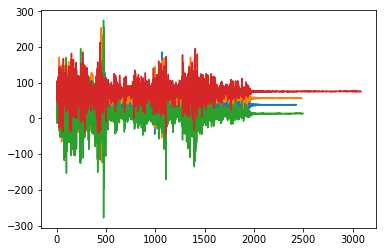

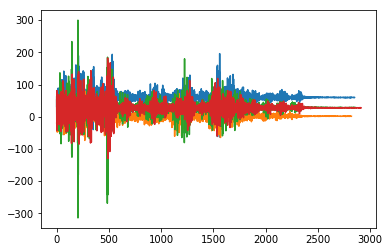

In [29]:
plot_nodes(1)

In [30]:
nodes

[9, 8, 7, 6]

In [31]:
#drop trains less than 7 seconds
#matches with more than 4 nodes: find median lengths instead of dropping
#misdetection due to close trains
#given date and time find trains
#band pass filter: 2Hz - 40Hz
